In [3]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = 'sales_data.csv'
sales_data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Info:")
print(sales_data.info())

print("\nFirst 5 Rows of the Dataset:")
print(sales_data.head())

# Check for missing values
print("\nMissing Values:")
print(sales_data.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Product   500 non-null    object 
 1   Region    500 non-null    object 
 2   Sales     499 non-null    float64
 3   Profit    499 non-null    float64
 4   Discount  500 non-null    float64
 5   Category  500 non-null    object 
 6   Date      500 non-null    object 
dtypes: float64(3), object(4)
memory usage: 27.5+ KB
None

First 5 Rows of the Dataset:
      Product Region   Sales  Profit   Discount     Category        Date
0       Mouse   East  2323.0   540.0  28.457501  Electronics  2023-01-01
1     Monitor  South  2581.0  -171.0   7.575833  Electronics  2023-01-02
2  Headphones   East  3919.0  1020.0  10.777522  Accessories  2023-01-03
3       Mouse   West  2074.0  -489.0  11.380758  Accessories  2023-01-04
4      Tablet  North   749.0   841.0  18.166145  Accessories  2023-01-05

Miss

In [5]:
# Filling missing values with the mean of the respective columns
sales_data['Sales'].fillna(sales_data['Sales'].mean(), inplace=True)
sales_data['Profit'].fillna(sales_data['Profit'].mean(), inplace=True)

# Convert the 'Date' column to datetime format
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Remove duplicates if any
sales_data.drop_duplicates(inplace=True)

# Verify the cleaning process
print("\nCleaned Dataset Info:")
print(sales_data.info())

print("\nMissing Values After Cleaning:")
print(sales_data.isnull().sum())



Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Product   499 non-null    object        
 1   Region    499 non-null    object        
 2   Sales     499 non-null    float64       
 3   Profit    499 non-null    float64       
 4   Discount  499 non-null    float64       
 5   Category  499 non-null    object        
 6   Date      499 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 31.2+ KB
None

Missing Values After Cleaning:
Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


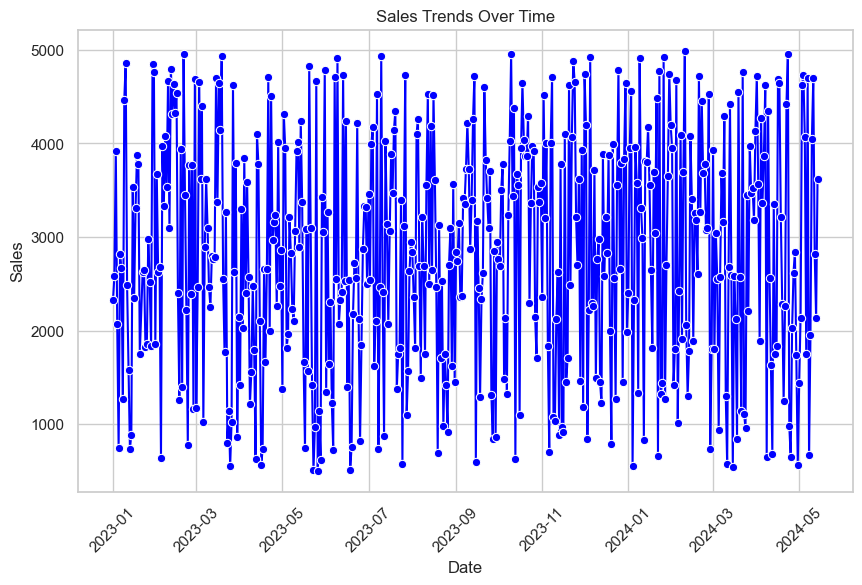

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
sns.set(style='whitegrid')

# Sales Trends Over Time (Time Series Plot)
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_data, x='Date', y='Sales', marker='o', color='blue')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


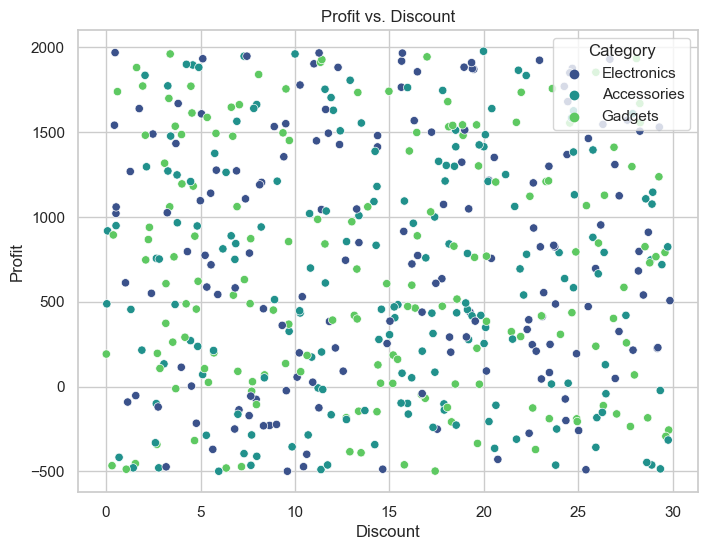

In [8]:
# Profit vs. Discount (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sales_data, x='Discount', y='Profit', hue='Category', palette='viridis')
plt.title('Profit vs. Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()


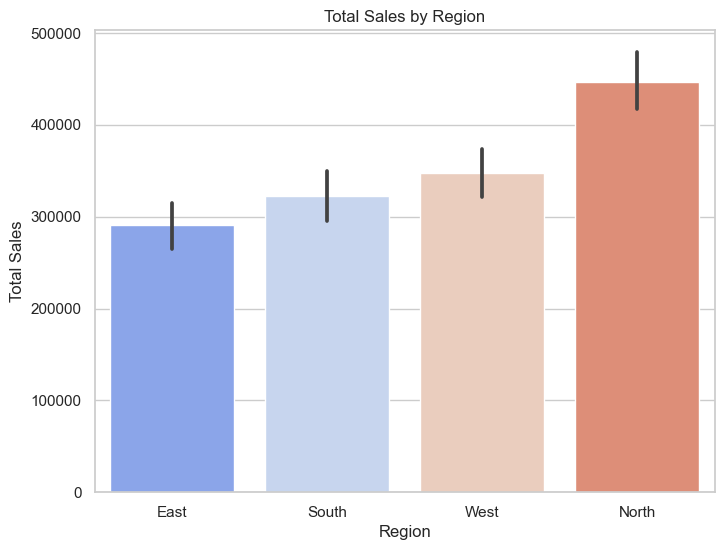

In [11]:
# Sales by Region (Bar Plot)
plt.figure(figsize=(8, 6))
sns.barplot(data=sales_data, x='Region', y='Sales', estimator=sum, palette='coolwarm')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()


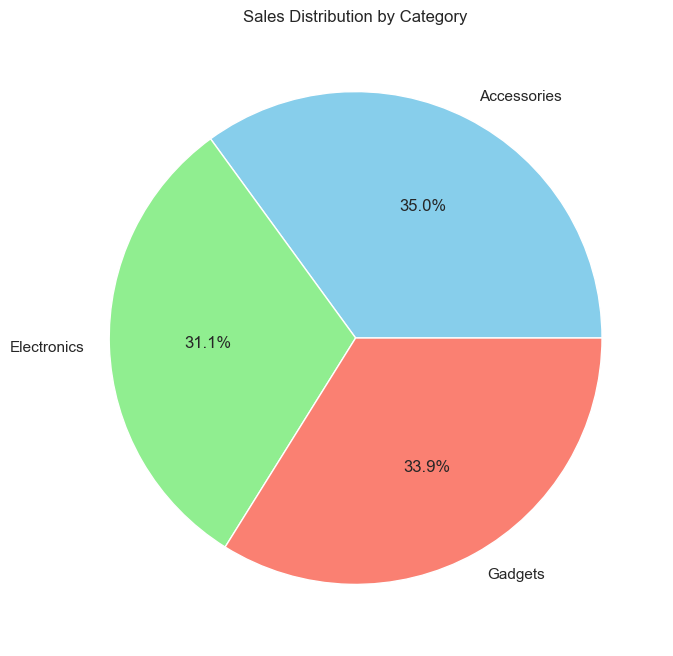

In [13]:
# Sales by Category (Pie Chart)
category_sales = sales_data.groupby('Category')['Sales'].sum()
plt.figure(figsize=(8, 8))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Sales Distribution by Category')
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Prepare the features and target variable
X = sales_data[['Profit', 'Discount']]
y = sales_data['Sales']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict sales on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")


R² Score: 0.023311663100064717
Mean Squared Error (MSE): 1475760.1730535992
